Deep learning with Pytorch 

In [1]:
#creating a tensor using pytorch
import torch
x=torch.tensor([1,2,3])
print(x)


tensor([1, 2, 3])


In [2]:
import torch
print(torch.__version__)

2.6.0+cpu


In [3]:
#MLP with one hidden layer
import torch.nn as nn
import torch.nn.functional as F
class MLP(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(MLP,self).__init__()
        self.fc1=nn.Linear(input_size,hidden_size)#input layer to hidden layer
        self.fc2=nn.Linear(hidden_size,num_classes)#hidden layer to op
        
    def forward(self,x):
        x=F.relu(self.fc1(x))#passes the input x through the first layer and applies relu function to its output
        x=self.fc2(x)#passes the input throught the second layer 
        return x
    

In [4]:
#defining the dataset
import torchvision
import torchvision.transforms as transform
from torch.utils.data import DataLoader
#define the transformation that you need to do to the image before passing it to the model
transform=transform.Compose([
    transform.ToTensor(),#converts image to tensors
    transform.Normalize((0.5,),(0.5))#sets mean and std to 0.5 each and normalizes the data
])

#defining the dataset 
train_dataset=torchvision.datasets.MNIST(
    root='./data',#sets location
    train=True,#loads training set
    transform=transform,#applies the above given transform
    download=True#downloads if not availaible
)

train_loader=DataLoader(
    dataset=train_dataset,#uses the above specified training dataset
    batch_size=64,#loads data in batches
    shuffle=True,#shuffles the data
    num_workers=2#cpu threads 2
)

In [5]:
model=MLP(input_size=784,hidden_size=500,num_classes=10)#define the model
crit=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)#optimizer with learning rate
loss_values=[]
num_epochs=2#since it takes a while to run
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images=images.reshape(-1,28*28)
        
        #forward
        outputs=model(images)
        loss=crit(outputs,labels)
        
        #backward
        optimizer.zero_grad()#all gradients set to zero
        loss.backward()#gradients using back propogation
        optimizer.step()
        loss_values.append(loss.item())
        print(f'Epoch[{epoch+1}/{num_epochs}],step[{i+1}/{len(train_loader)}],loss:[{loss.item()}]')
        
        

Epoch[1/2],step[1/938],loss:[2.3601059913635254]
Epoch[1/2],step[2/938],loss:[2.2942352294921875]
Epoch[1/2],step[3/938],loss:[2.2821600437164307]
Epoch[1/2],step[4/938],loss:[2.2737889289855957]
Epoch[1/2],step[5/938],loss:[2.279712438583374]
Epoch[1/2],step[6/938],loss:[2.2333261966705322]
Epoch[1/2],step[7/938],loss:[2.2209312915802]
Epoch[1/2],step[8/938],loss:[2.245797872543335]
Epoch[1/2],step[9/938],loss:[2.21498703956604]
Epoch[1/2],step[10/938],loss:[2.2295126914978027]
Epoch[1/2],step[11/938],loss:[2.158289909362793]
Epoch[1/2],step[12/938],loss:[2.1562232971191406]
Epoch[1/2],step[13/938],loss:[2.1234800815582275]
Epoch[1/2],step[14/938],loss:[2.1192879676818848]
Epoch[1/2],step[15/938],loss:[2.1457464694976807]
Epoch[1/2],step[16/938],loss:[2.1133852005004883]
Epoch[1/2],step[17/938],loss:[2.090728521347046]
Epoch[1/2],step[18/938],loss:[2.1391725540161133]
Epoch[1/2],step[19/938],loss:[2.0552735328674316]
Epoch[1/2],step[20/938],loss:[2.0562386512756348]
Epoch[1/2],step[21

In [6]:
#metrics for the training
testloss=0
correct=0
for images,labels in train_loader:
    images=images.reshape(-1,28*28)
    outputs=model(images)
    loss=crit(outputs,labels)
    testloss+=loss.item()
    predicted=outputs.argmax(1)#gets the predicted class from the output
    correct+=(predicted==labels).sum()
testloss/=len(train_loader)#we shouldnt use train_loader we shoudl define test loader with unseen data done this for simplicity
accuracy=100.*correct/len(train_loader.dataset)#same here as well
    

In [7]:
print(testloss)
print(accuracy)

0.3306925293526797
tensor(90.3050)


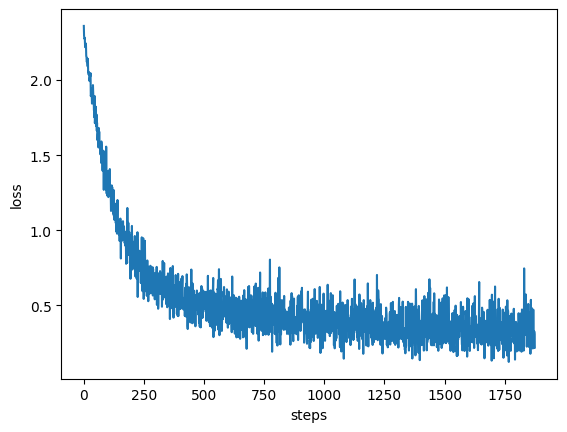

In [8]:
#monitoring and plotting the loss values
import matplotlib.pyplot as plt
plt.plot(loss_values)
plt.xlabel('steps')
plt.ylabel('loss')
plt.show()

In [9]:
#incase u want to use a different optimizer you can go to the training code and make the optimizer variable this
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [11]:
#saving the model
torch.save(model,'savedmodels/model.pth')

In [15]:
loadmodel=torch.load("savedmodels/model.pth",weights_only=False)#since the model is from a trusted source

In [16]:
#to save only the parameters
torch.save(model.state_dict(),'savedmodels/params.pth')

In [17]:
#loading those
loadmodel.load_state_dict(torch.load('savedmodels/params.pth')) 

<All keys matched successfully>

In [18]:
#saving and loading models during training 
#save the model in the loop when the epoch is completed

In [20]:
#saving more info as checkpoint
torch.save({
    'epoch':epoch,
    'model_state_dict':model.state_dict(),
    'optimizer_state_dict':optimizer.state_dict(),
    'loss':loss,
},'savedmodels/checkpoint.pth')

In [25]:
checkpoint=torch.load('savedmodels/checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch1=checkpoint['epoch']
loss1=checkpoint['loss']

print(epoch1)
print(loss1)

1
tensor(0.3688, requires_grad=True)


Practice exercise

In [ ]:
import torch 
import torch.nn as nn
#created the model
class MLP2(nn.Module):
    def __init__(self,input,hidden,classes):
        super(MLP2,self).__init__()
        self.fc1=nn.Linear(input,hidden)
        self.relu=nn.ReLU()
        self.fc2=nn.Linear(hidden,classes)
    
    def forward(self,x):
        out=self.fc1(x)
        out=self.relu(out)
        out=self.fc2(out)
        return out
    

In [ ]:
model=MLP2(784,500,10)#input,hidden,classes
crite=nn.CrossEntropyLoss()#loss func
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)#optimizer of loss

lossvals=[]
epochs=2
for epoch in range (epochs):
    for i,(images,labels) in enumerate(train_loader):
        images=images.reshape(-1,28*28)
        output=model(images)
        loss=crite(output,labels)
        optimizer.zero_grad()
        loss.backward()#new grads computed
        optimizer.step()#updated the parameters on the new grad
        
        lossvals.append(loss.item())
        
        print(f'epoch[{epoch+1}/{epochs}], stepp[{i+1}/{len(train_loader)}],loss:{loss}')
        
        


epoch[1/2], stepp[1/938],loss:2.308497667312622
epoch[1/2], stepp[2/938],loss:15.390839576721191
epoch[1/2], stepp[3/938],loss:11.07213020324707
epoch[1/2], stepp[4/938],loss:9.984865188598633
epoch[1/2], stepp[5/938],loss:13.543670654296875
epoch[1/2], stepp[6/938],loss:10.972734451293945
epoch[1/2], stepp[7/938],loss:12.042170524597168
epoch[1/2], stepp[8/938],loss:9.73624324798584
epoch[1/2], stepp[9/938],loss:5.276930332183838
epoch[1/2], stepp[10/938],loss:3.8332691192626953
epoch[1/2], stepp[11/938],loss:2.870020866394043
epoch[1/2], stepp[12/938],loss:2.079425811767578
epoch[1/2], stepp[13/938],loss:2.1264731884002686
epoch[1/2], stepp[14/938],loss:1.9824435710906982
epoch[1/2], stepp[15/938],loss:1.948755145072937
epoch[1/2], stepp[16/938],loss:1.959787130355835
epoch[1/2], stepp[17/938],loss:1.8363994359970093
epoch[1/2], stepp[18/938],loss:2.018266201019287
epoch[1/2], stepp[19/938],loss:1.8192205429077148
epoch[1/2], stepp[20/938],loss:1.521697998046875
epoch[1/2], stepp[21/